# Build Graphs

In this notebook we build graphs from the raw data.

In [3]:
from gnn_tracking.utils.plotting import EventPlotter
from gnn_tracking.graph_construction.graph_builder import GraphBuilder
from gnn_tracking.preprocessing.point_cloud_builder import PointCloudBuilder
from gnn_tracking.utils.plotting import PointCloudPlotter
from pathlib import Path

In [8]:
data_path = Path.home() / "data" / "gnn_tracking"

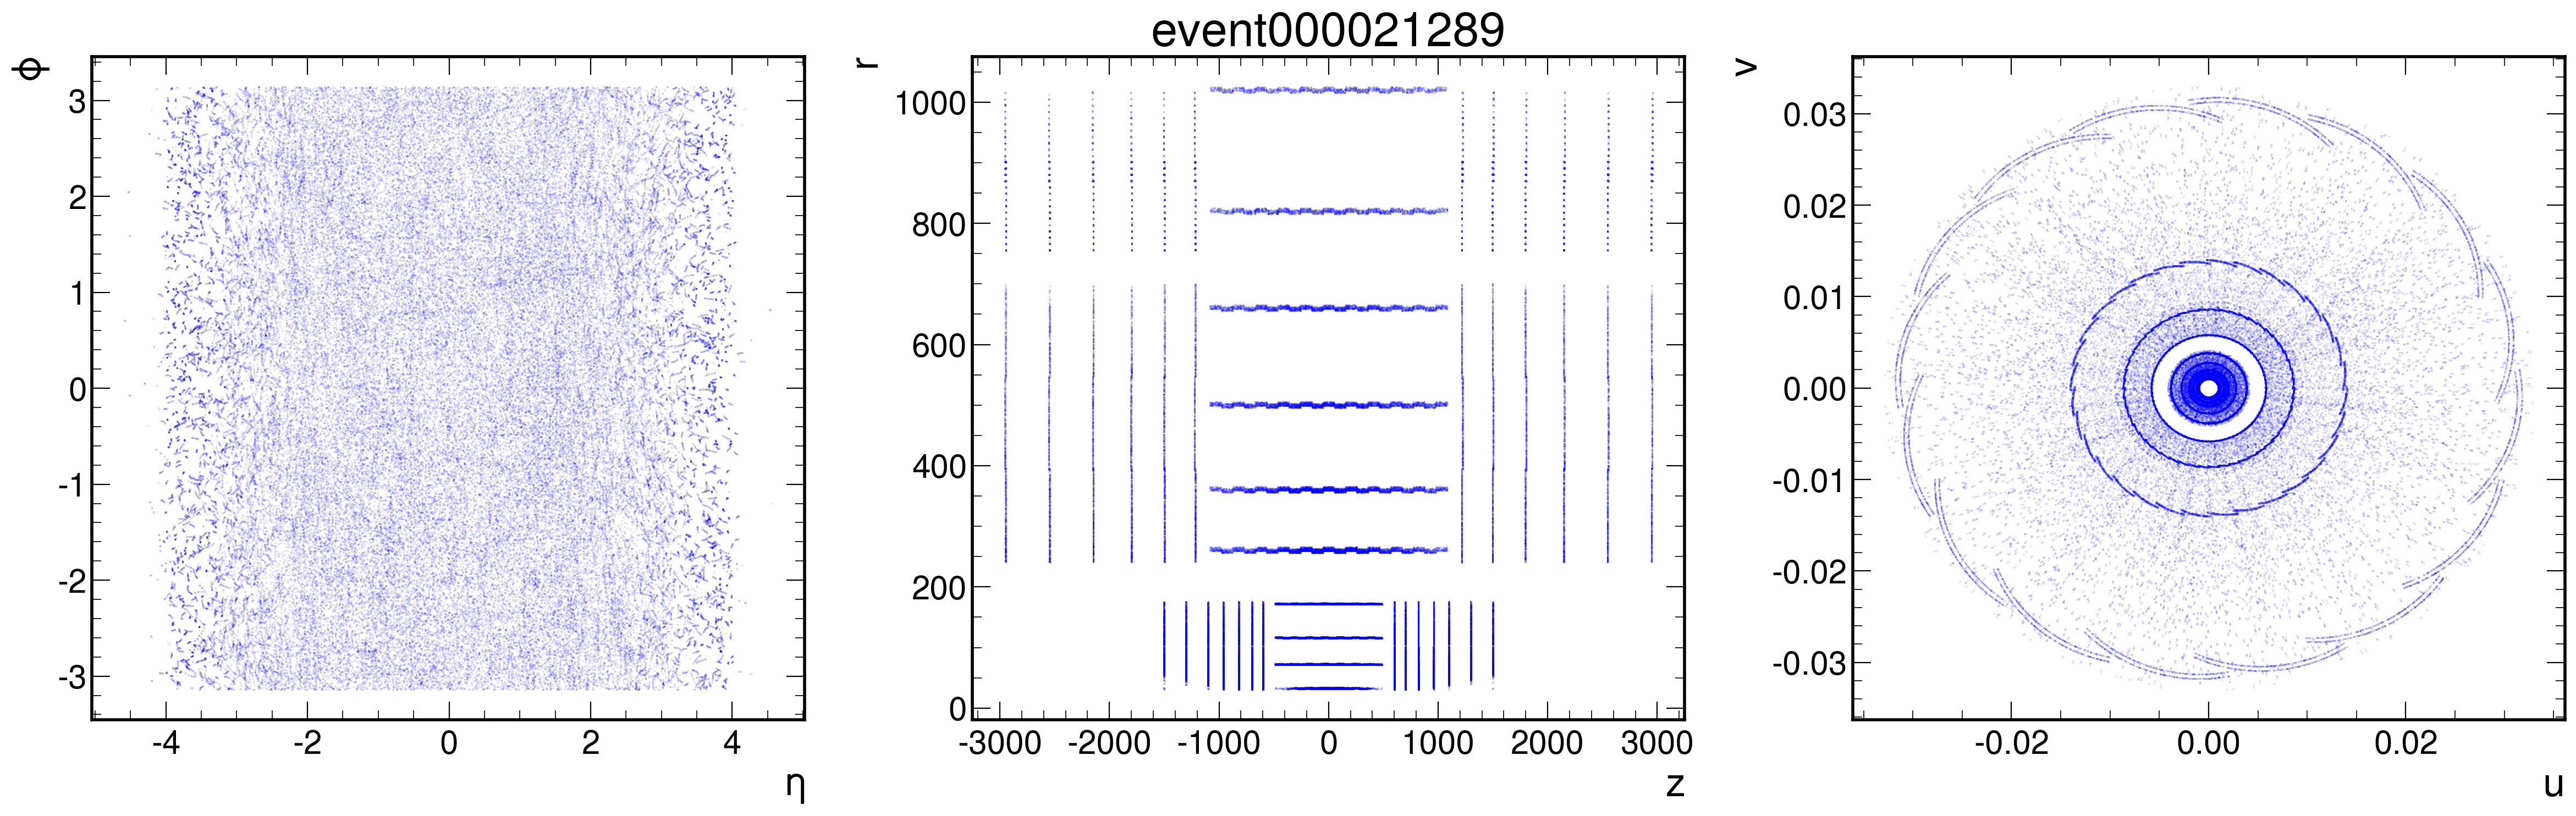

In [9]:
# The input directory should contain the trackml dataset
event_plotter = EventPlotter(indir=data_path / "input")
event_plotter.plot_ep_rv_uv(evtid=21289)

In [10]:
# build point clouds for each sector in the pixel layers only
pc_builder = PointCloudBuilder(
    indir=data_path / "input",
    outdir=data_path / "point_clouds",
    n_sectors=32,
    pixel_only=True,
    redo=False,
    measurement_mode=False,
    sector_di=0,
    sector_ds=1.3,
    thld=0.9,
    log_level=0,
)
pc_builder.process(stop=10)

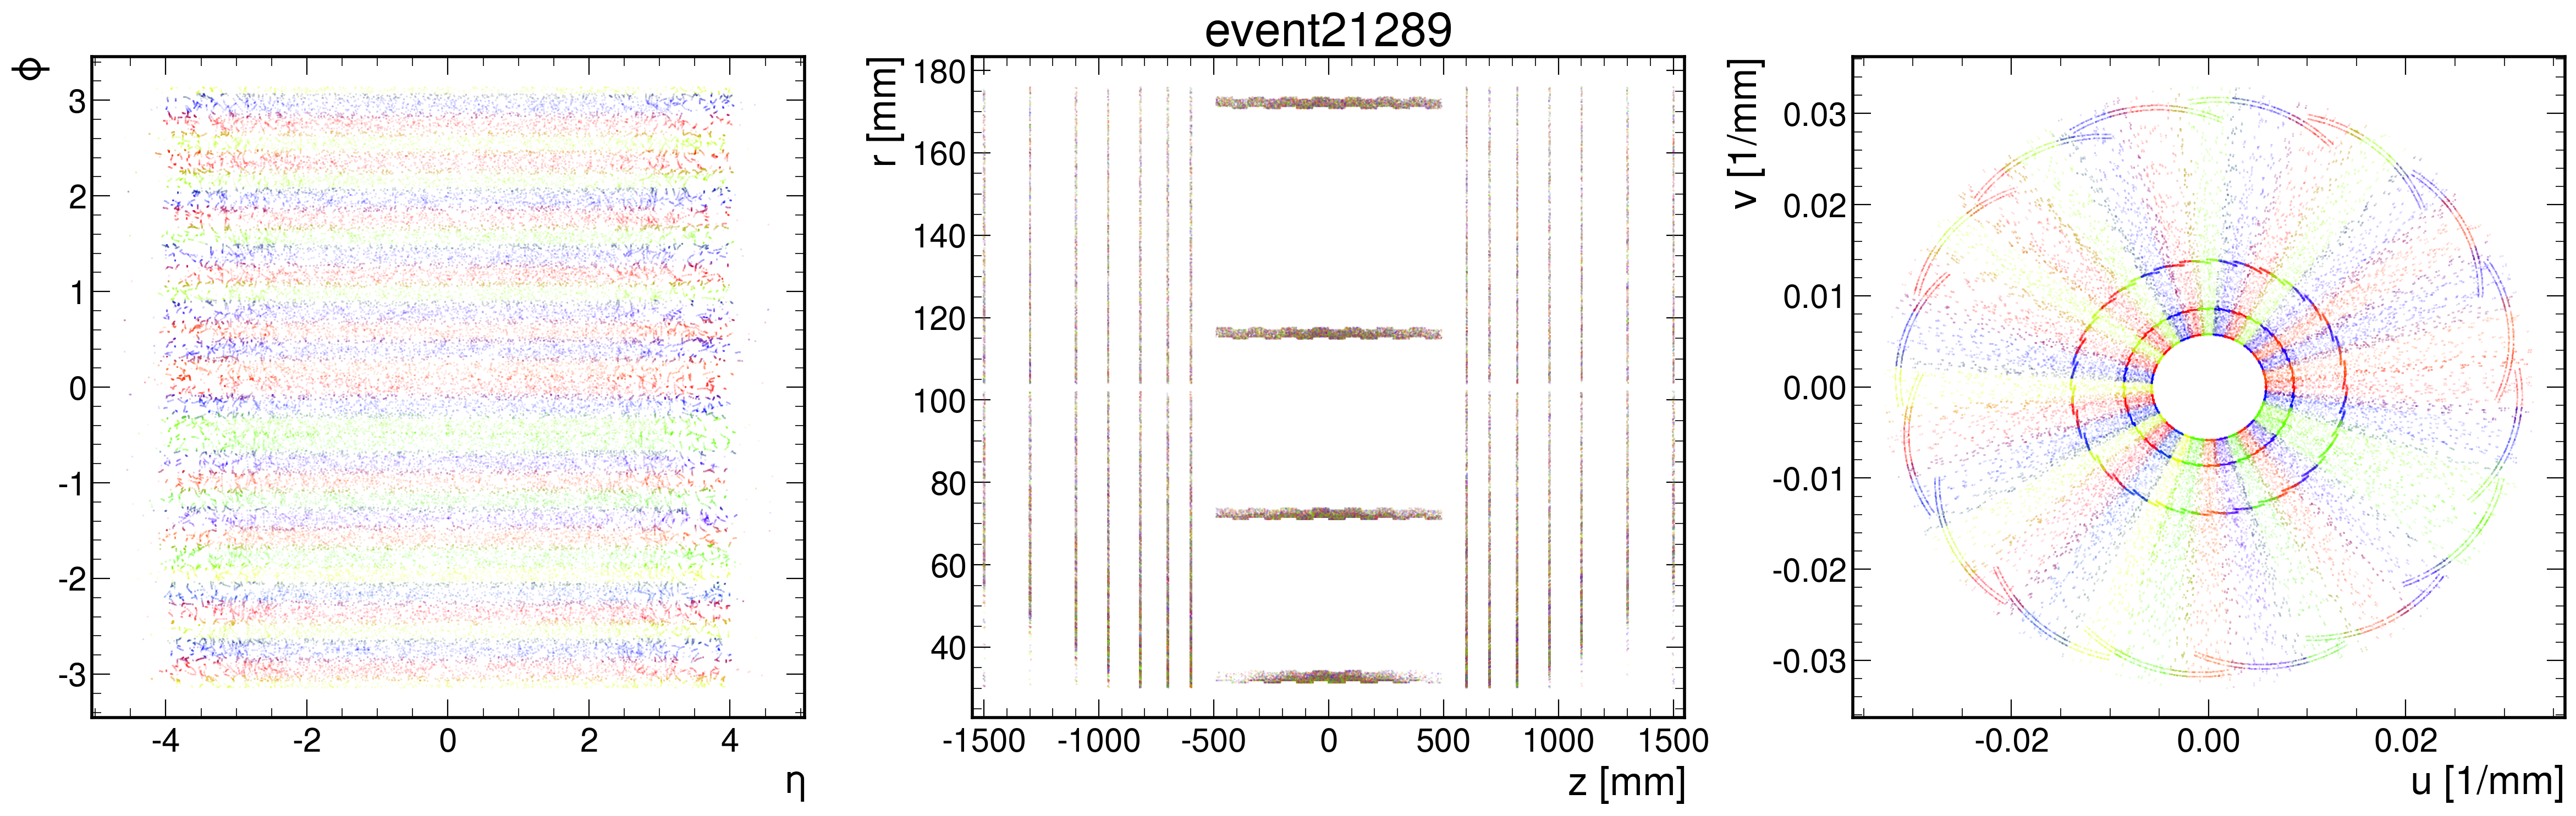

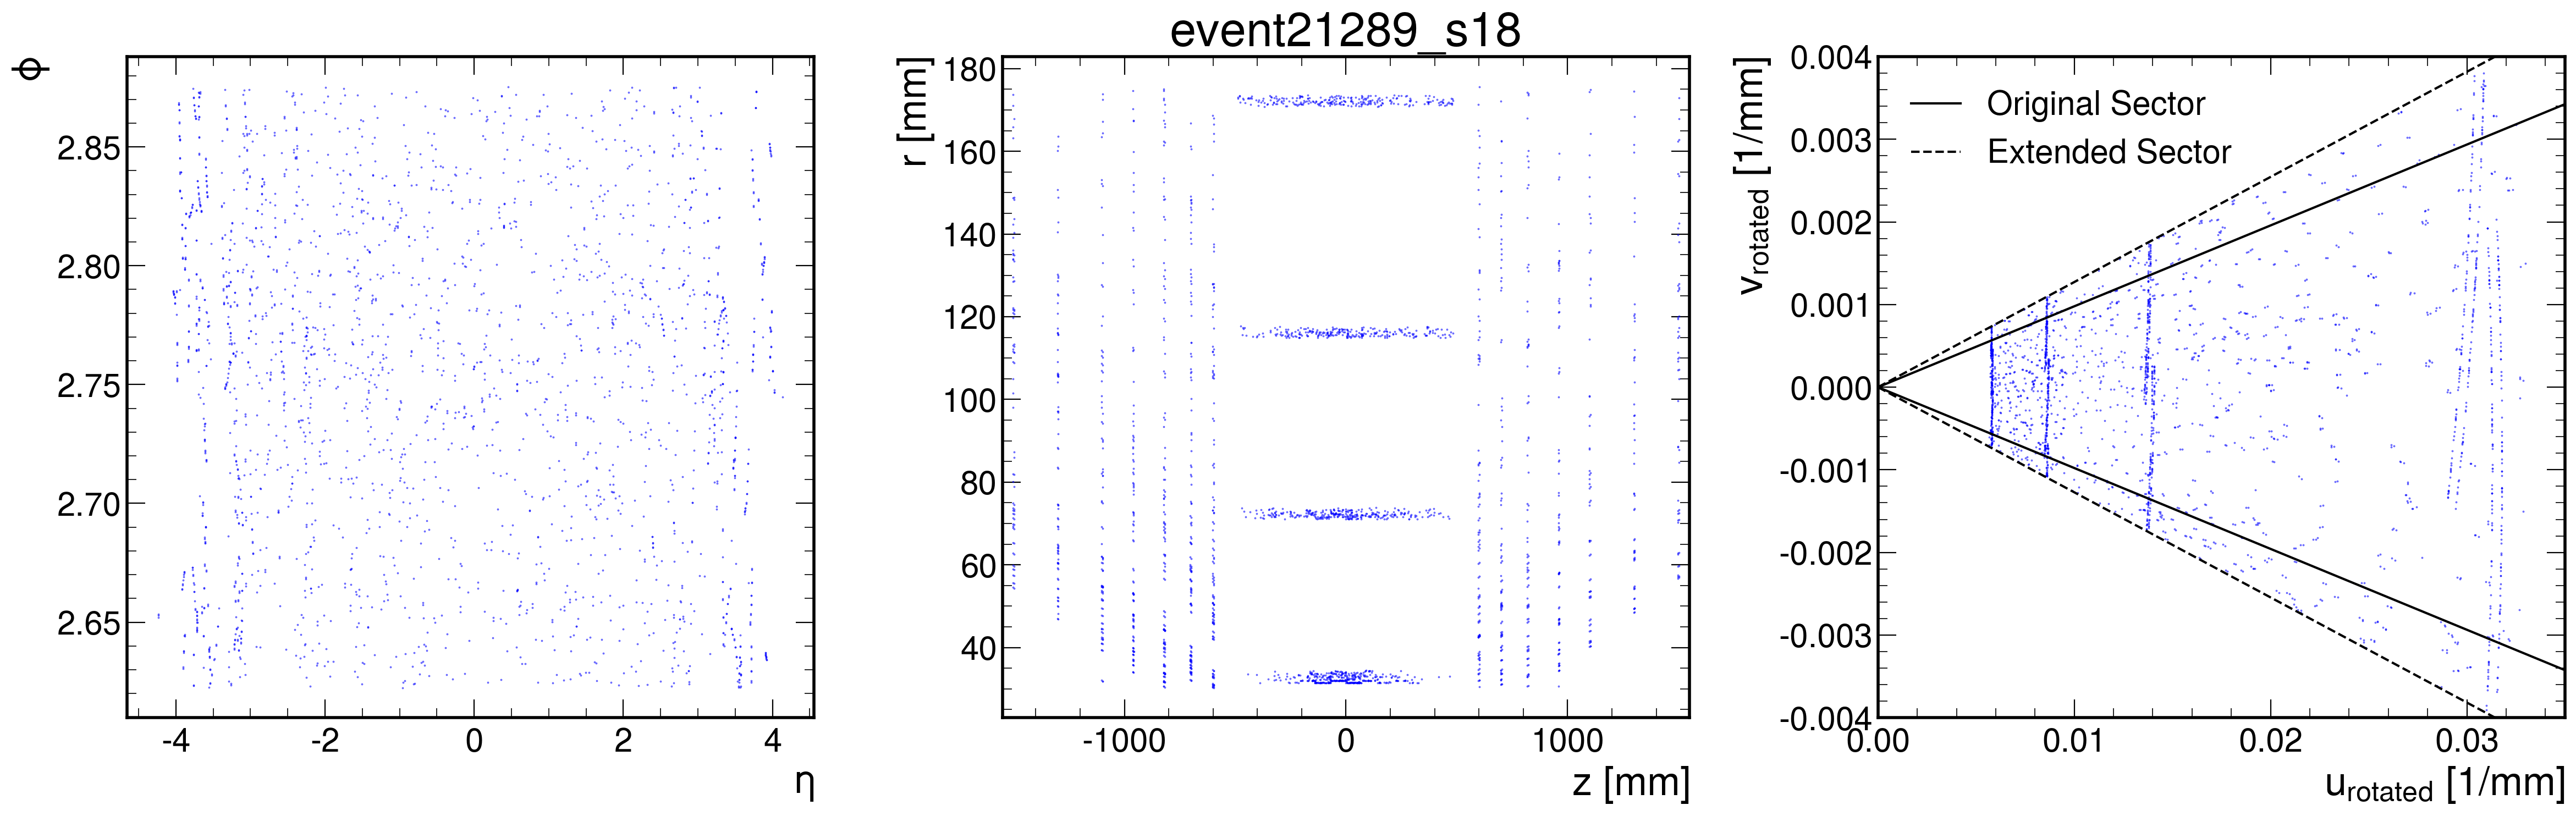

In [11]:
# visualize the sectors in each event and an overlapped ('extended') sector
pc_plotter = PointCloudPlotter(
    data_path / "point_clouds", n_sectors=pc_builder.n_sectors
)
pc_plotter.plot_ep_rv_uv_all_sectors(21289)
pc_plotter.plot_ep_rv_uv_with_boundary(
    21289, 18, pc_builder.sector_di, pc_builder.sector_ds
)

In [12]:
graph_builder = GraphBuilder(
    indir=data_path / "point_clouds",
    outdir=data_path / "graphs",
    redo=False,
    measurement_mode=False,
    phi_slope_max=0.0035,
    z0_max=200,
    dR_max=2.3,
    log_level=0,
)
graph_builder.process(start=0, stop=10)

INFO: Loading 10 graphs (out of 3200 available).


{}